<a href="https://colab.research.google.com/github/Mohammed287-lab/ANN/blob/main/HOMEWORK%20AI%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('telco.csv')

In [103]:
print(df.head())

   Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female            No     Yes         No       1   
1           1  5575-GNVDE    Male            No      No         No      34   
2           2  3668-QPYBK    Male            No      No         No       2   
3           3  7795-CFOCW    Male            No      No         No      45   
4           4  9237-HQITU  Female            No      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [104]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [105]:
print(df.isnull().sum())

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [106]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [107]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-107-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [108]:
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


Text(0.5, 1.0, 'Tenure Distribution')

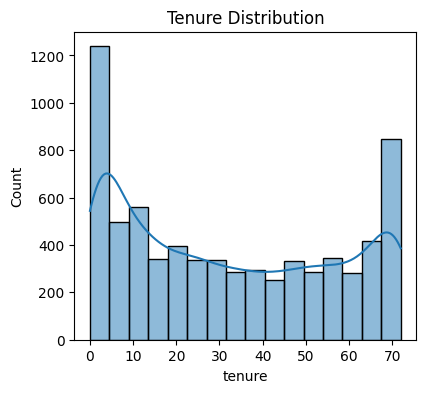

In [109]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')

Text(0.5, 1.0, 'Monthly Charges Distribution')

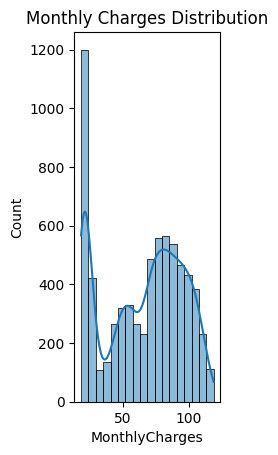

In [110]:
plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')

Text(0.5, 1.0, 'Total Charges Distribution')

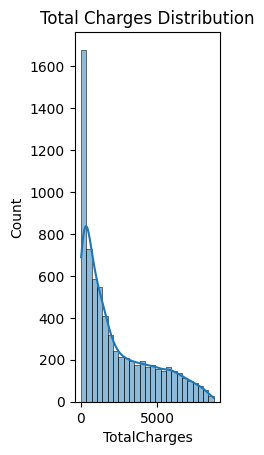

In [111]:
plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges Distribution')


In [112]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

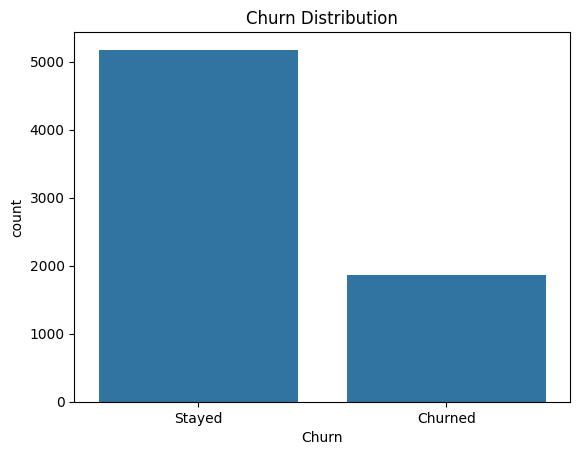

In [113]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [114]:
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

In [115]:
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
scaler = MinMaxScaler()
normalized = scaler.fit_transform(features)


In [116]:
G = nx.Graph()
k = 3
customer_ids = df['customerID'].tolist()
distance_matrix = pairwise_distances(normalized, metric='euclidean')

In [117]:
for cust_id in customer_ids:
    G.add_node(cust_id)



In [118]:
for i, cust_id in enumerate(customer_ids):
    distances = distance_matrix[i]
    neighbor_indices = np.argsort(distances)[1:k+1]
    for j in neighbor_indices:
        G.add_edge(cust_id, customer_ids[j])

In [119]:
source = customer_ids[0]
lengths = nx.single_source_shortest_path_length(G, source)
print(f"Shortest paths from {source}:")
print(lengths)

Shortest paths from 7590-VHVEG:
{'7590-VHVEG': 0, '5999-LCXAO': 1, '6317-YPKDH': 1, '9526-BIHHD': 1, '1816-FLZDK': 1, '8665-UTDHZ': 2, '6656-JWRQX': 2, '0032-PGELS': 2, '5868-CZJDR': 3}


In [120]:
centrality = nx.degree_centrality(G)
print("Top 5 nodes by degree centrality:")
print(sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by degree centrality:
[('8305-VHZBZ', 0.0017040613462084636), ('8048-DSDFQ', 0.0017040613462084636), ('1493-AMTIE', 0.0017040613462084636), ('1963-SVUCV', 0.0015620562340244249), ('7601-WFVZV', 0.0014200511218403862)]


In [121]:
lcc = max(nx.connected_components(G), key=len)
LCC = G.subgraph(lcc)
avg_path_length = nx.average_shortest_path_length(LCC)
print(f"Average shortest path in LCC: {avg_path_length}")

Average shortest path in LCC: 58.09232010905834


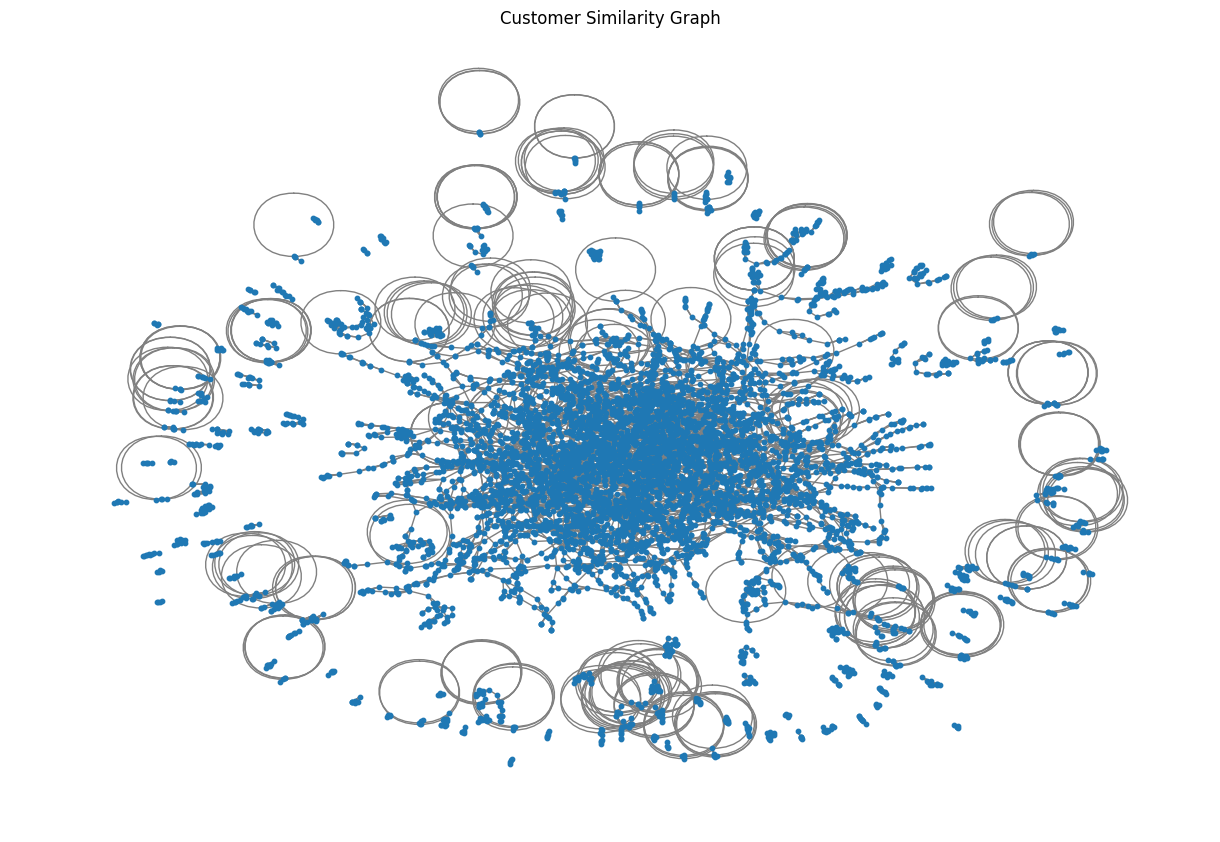

In [122]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=10, edge_color='gray')
plt.title("Customer Similarity Graph")
plt.show()

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [134]:
# Combine X_train and y_train temporarily to remove corresponding rows
import pandas as pd

# Make sure both are pandas Series/DataFrames
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

# Drop rows where y_train is NaN
X_train = X_train[~y_train.isna()]
y_train = y_train[~y_train.isna()]


In [135]:
print(df.columns)

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [136]:
# Map 'Churn' column in the original DataFrame 'df'
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Now create df_model and apply get_dummies
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'Contract', 'MonthlyCharges', 'TotalCharges']

df_model = df[cols + ['Churn']]
df_model = pd.get_dummies(df_model, drop_first=True)

# The rest of your code remains the same

In [145]:
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

In [150]:
print(y_train.unique())  # Check unique values in y_train


[]


In [152]:
print(y_train.isnull().sum())  # Count NaN values in y_train


0


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
# Combine X_train and y_train temporarily to remove corresponding rows
import pandas as pd

# Make sure both are pandas Series/DataFrames
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

# Check if y_train contains any non-NaN values before dropping rows
if y_train.notna().any():  # Proceed only if there are non-NaN values
    # Drop rows where y_train is NaN
    X_train = X_train[~y_train.isna()]
    y_train = y_train[~y_train.isna()]

    # Now you can proceed with model fitting
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
else:
    print("y_train contains only NaN values. Cannot proceed with model fitting.")

y_train contains only NaN values. Cannot proceed with model fitting.


In [156]:
# Combine X_train and y_train temporarily to remove corresponding rows
import pandas as pd

# Make sure both are pandas Series/DataFrames
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

# Check if y_train contains any non-NaN values before dropping rows
if y_train.notna().any():  # Proceed only if there are non-NaN values
    # Drop rows where y_train is NaN
    X_train = X_train[~y_train.isna()]
    y_train = y_train[~y_train.isna()]

    # Now you can proceed with model fitting
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
else:
    print("y_train contains only NaN values. Cannot proceed with model fitting.")
# Instead of fitting the model directly after the conditional statement,
# move the model fitting part inside the if block to ensure it only runs
# when there's valid training data:

y_train contains only NaN values. Cannot proceed with model fitting.


In [159]:
if y_train.notna().any():  # Proceed only if there are non-NaN values
    # Drop rows where y_train is NaN
    X_train = X_train[~y_train.isna()]
    y_train = y_train[~y_train.isna()]

    # Now you can proceed with model fitting
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
else:
    print("y_train contains only NaN values. Cannot proceed with model fitting.")

y_train contains only NaN values. Cannot proceed with model fitting.
